# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "dataset/train.p"
validation_file = "dataset/valid.p"
testing_file = "dataset/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "dataset/train.p"
validation_file = "dataset/valid.p"
testing_file = "dataset/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
n_train = X_train.shape[0]
n_valid = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = X_train.shape[0]
n_classes = len(set(y_train))
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)
print(n_train, n_valid, n_test, image_shape, n_classes)

(34799, 32, 32, 3) (34799,) (4410, 32, 32, 3) (4410,) (12630, 32, 32, 3) (12630,)
34799 4410 12630 34799 43


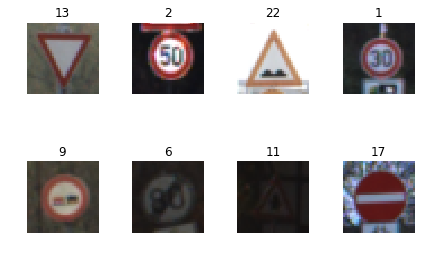

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_figures(figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind,title in zip(range(len(figures)), figures):
        axeslist.ravel()[ind].imshow(figures[title], cmap=plt.gray())
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    plt.show()
        
number_to_stop = 8
figures = {}
for i in range(number_to_stop):
    index = np.random.randint(n_train - 1)
    figures[y_train[index]] = X_train[index]

plot_figures(figures, 2, 4)

In [45]:
import tensorflow as tf
tf.reset_default_graph()

# define our input (e.g. the data that changes every batch)
# The first dim is None, and gets sets automatically based on batch size fed in
X = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int64, [None])
is_training = tf.placeholder(tf.bool)

# define model
def complex_model(X,y,is_training, keep_prob):
    # Weights
    weight = {
        'W_conv': tf.Variable(tf.truncated_normal([7, 7, 3, 32], stddev=0.2)),
        'W_affine': tf.Variable(tf.truncated_normal([13*13*32, 1024], stddev=0.2)),
        'W_out': tf.Variable(tf.truncated_normal([1024, n_classes], stddev=0.2))
    }
    
    # Biases
    bias = {
        'b_conv': tf.Variable(tf.ones([32])/n_classes),
        'b_affine': tf.Variable(tf.ones([1024])/n_classes),
        'b_out': tf.Variable(tf.ones([n_classes])/n_classes)
    } 
    
    #BN
    scale = tf.Variable(tf.ones([32])/n_classes)
    shift = tf.Variable(tf.ones([32])/n_classes)
    epsilon = 1e-8 # Numeric stability
    
    # Model Graph
    X1 = tf.nn.conv2d(X, weight['W_conv'], strides=[1, 1, 1, 1], padding='VALID') + bias['b_conv']
    X_relu = tf.nn.relu(X1)
    mean, var = tf.nn.moments(X_relu, axes=[0])
    X_bn = tf.nn.batch_normalization(X_relu, mean, var, shift, scale, epsilon)
    X_mp = tf.nn.relu(tf.nn.max_pool(X_relu, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME'))
    flat_dim = X_mp.shape[1]*X_mp.shape[2]*X_mp.shape[3]
    X_flatten = tf.reshape(X_mp, [-1, int(flat_dim)])
    X_affine = tf.matmul(X_flatten, weight['W_affine']) + bias['b_affine']
    y_out = tf.matmul(X_affine, weight['W_out']) + bias['b_out']
    
    return y_out

y_out = complex_model(X,y,is_training)

In [46]:
x = np.random.randn(64, 32, 32, 3)

with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    sess.run(tf.global_variables_initializer())
    ans = sess.run(y_out,feed_dict={X:x,is_training:True})
    %timeit sess.run(y_out,feed_dict={X:x,is_training:True})
    print(ans.shape)
    print(np.array_equal(ans.shape, np.array([64, 10])))

21.2 ms ± 599 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
(64, 43)
False


In [47]:
mean_loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=y_out))
optimizer = tf.train.AdamOptimizer(learning_rate = 0.0001)

# batch normalization in tensorflow requires this extra dependency
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(extra_update_ops):
    train_step = optimizer.minimize(mean_loss)

Training
Iteration 0: with minibatch training loss = 3.44e+04 and accuracy of 0.094
Iteration 100: with minibatch training loss = 4.2e+03 and accuracy of 0.12
Iteration 200: with minibatch training loss = 1.57e+03 and accuracy of 0.42
Iteration 300: with minibatch training loss = 1.44e+03 and accuracy of 0.64
Iteration 400: with minibatch training loss = 820 and accuracy of 0.59
Iteration 500: with minibatch training loss = 873 and accuracy of 0.53
Epoch 1, Overall loss = 2.66e+03 and accuracy of 0.44


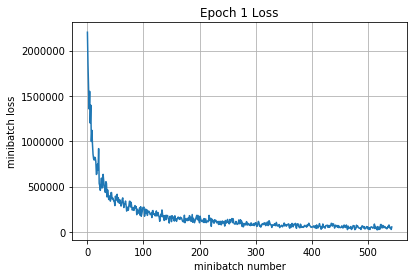

Iteration 600: with minibatch training loss = 460 and accuracy of 0.69
Iteration 700: with minibatch training loss = 430 and accuracy of 0.77
Iteration 800: with minibatch training loss = 689 and accuracy of 0.73
Iteration 900: with minibatch training loss = 502 and accuracy of 0.7
Iteration 1000: with minibatch training loss = 214 and accuracy of 0.77
Epoch 2, Overall loss = 439 and accuracy of 0.756


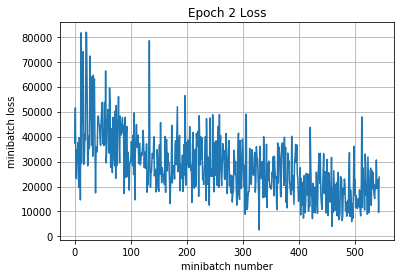

Iteration 1100: with minibatch training loss = 208 and accuracy of 0.84
Iteration 1200: with minibatch training loss = 284 and accuracy of 0.77
Iteration 1300: with minibatch training loss = 120 and accuracy of 0.86
Iteration 1400: with minibatch training loss = 261 and accuracy of 0.81
Iteration 1500: with minibatch training loss = 130 and accuracy of 0.88
Iteration 1600: with minibatch training loss = 483 and accuracy of 0.86
Epoch 3, Overall loss = 215 and accuracy of 0.85


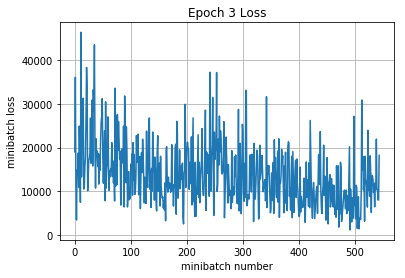

Iteration 1700: with minibatch training loss = 188 and accuracy of 0.91
Iteration 1800: with minibatch training loss = 184 and accuracy of 0.88
Iteration 1900: with minibatch training loss = 83.2 and accuracy of 0.92
Iteration 2000: with minibatch training loss = 109 and accuracy of 0.94
Iteration 2100: with minibatch training loss = 30.1 and accuracy of 0.95
Epoch 4, Overall loss = 124 and accuracy of 0.896


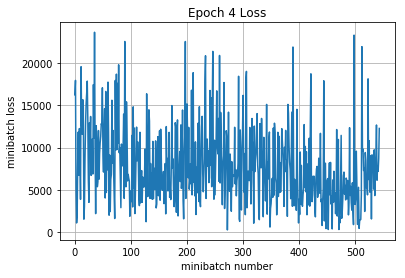

Iteration 2200: with minibatch training loss = 45.6 and accuracy of 0.95
Iteration 2300: with minibatch training loss = 73.7 and accuracy of 0.97
Iteration 2400: with minibatch training loss = 63.8 and accuracy of 0.94
Iteration 2500: with minibatch training loss = 135 and accuracy of 0.94
Iteration 2600: with minibatch training loss = 12.4 and accuracy of 0.97
Iteration 2700: with minibatch training loss = 62.3 and accuracy of 0.91
Epoch 5, Overall loss = 84 and accuracy of 0.919


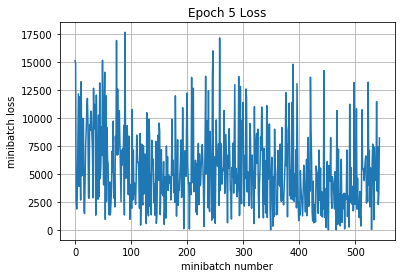

Validation
Epoch 1, Overall loss = 644 and accuracy of 0.773


In [49]:
import math
def run_model(session, predict, loss_val, Xd, yd,
              epochs=1, batch_size=64, print_every=100,
              training=None, plot_losses=False):
    # have tensorflow compute accuracy
    correct_prediction = tf.equal(tf.argmax(predict,1), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # shuffle indicies
    train_indicies = np.arange(Xd.shape[0])
    np.random.shuffle(train_indicies)

    training_now = training is not None
    
    # setting up variables we want to compute (and optimizing)
    # if we have a training function, add that to things we compute
    variables = [mean_loss,correct_prediction,accuracy]
    if training_now:
        variables[-1] = training
    
    # counter 
    iter_cnt = 0
    for e in range(epochs):
        # keep track of losses and accuracy
        correct = 0
        losses = []
        # make sure we iterate over the dataset once
        for i in range(int(math.ceil(Xd.shape[0]/batch_size))):
            # generate indicies for the batch
            start_idx = (i*batch_size)%X_train.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
            
            # create a feed dictionary for this batch
            feed_dict = {X: Xd[idx,:],
                         y: yd[idx],
                         is_training: training_now }
            # get batch size
            actual_batch_size = yd[i:i+batch_size].shape[0]
            
            # have tensorflow compute loss and correct predictions
            # and (if given) perform a training step
            loss, corr, _ = session.run(variables,feed_dict=feed_dict)
            
            # aggregate performance stats
            losses.append(loss*actual_batch_size)
            correct += np.sum(corr)
            
            # print every now and then
            if training_now and (iter_cnt % print_every) == 0:
                print("Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                      .format(iter_cnt,loss,np.sum(corr)/actual_batch_size))
            iter_cnt += 1
        total_correct = correct/Xd.shape[0]
        total_loss = np.sum(losses)/Xd.shape[0]
        print("Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"\
              .format(total_loss,total_correct,e+1))
        if plot_losses:
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()
    return total_loss,total_correct

with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    sess.run(tf.global_variables_initializer())
    print('Training')
    run_model(sess,y_out,mean_loss,X_train,y_train,5,64,100,train_step,True)
    print('Validation')
    run_model(sess,y_out,mean_loss,X_valid,y_valid,1,64)

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "dataset/train.p"
validation_file = "dataset/valid.p"
testing_file = "dataset/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = (X_train.shape[1:])
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Visualizations will be shown in the notebook.
%matplotlib inline

In [5]:
sign_names = pd.read_csv("dataset/signnames.csv")
sign_names.head(2)

ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)

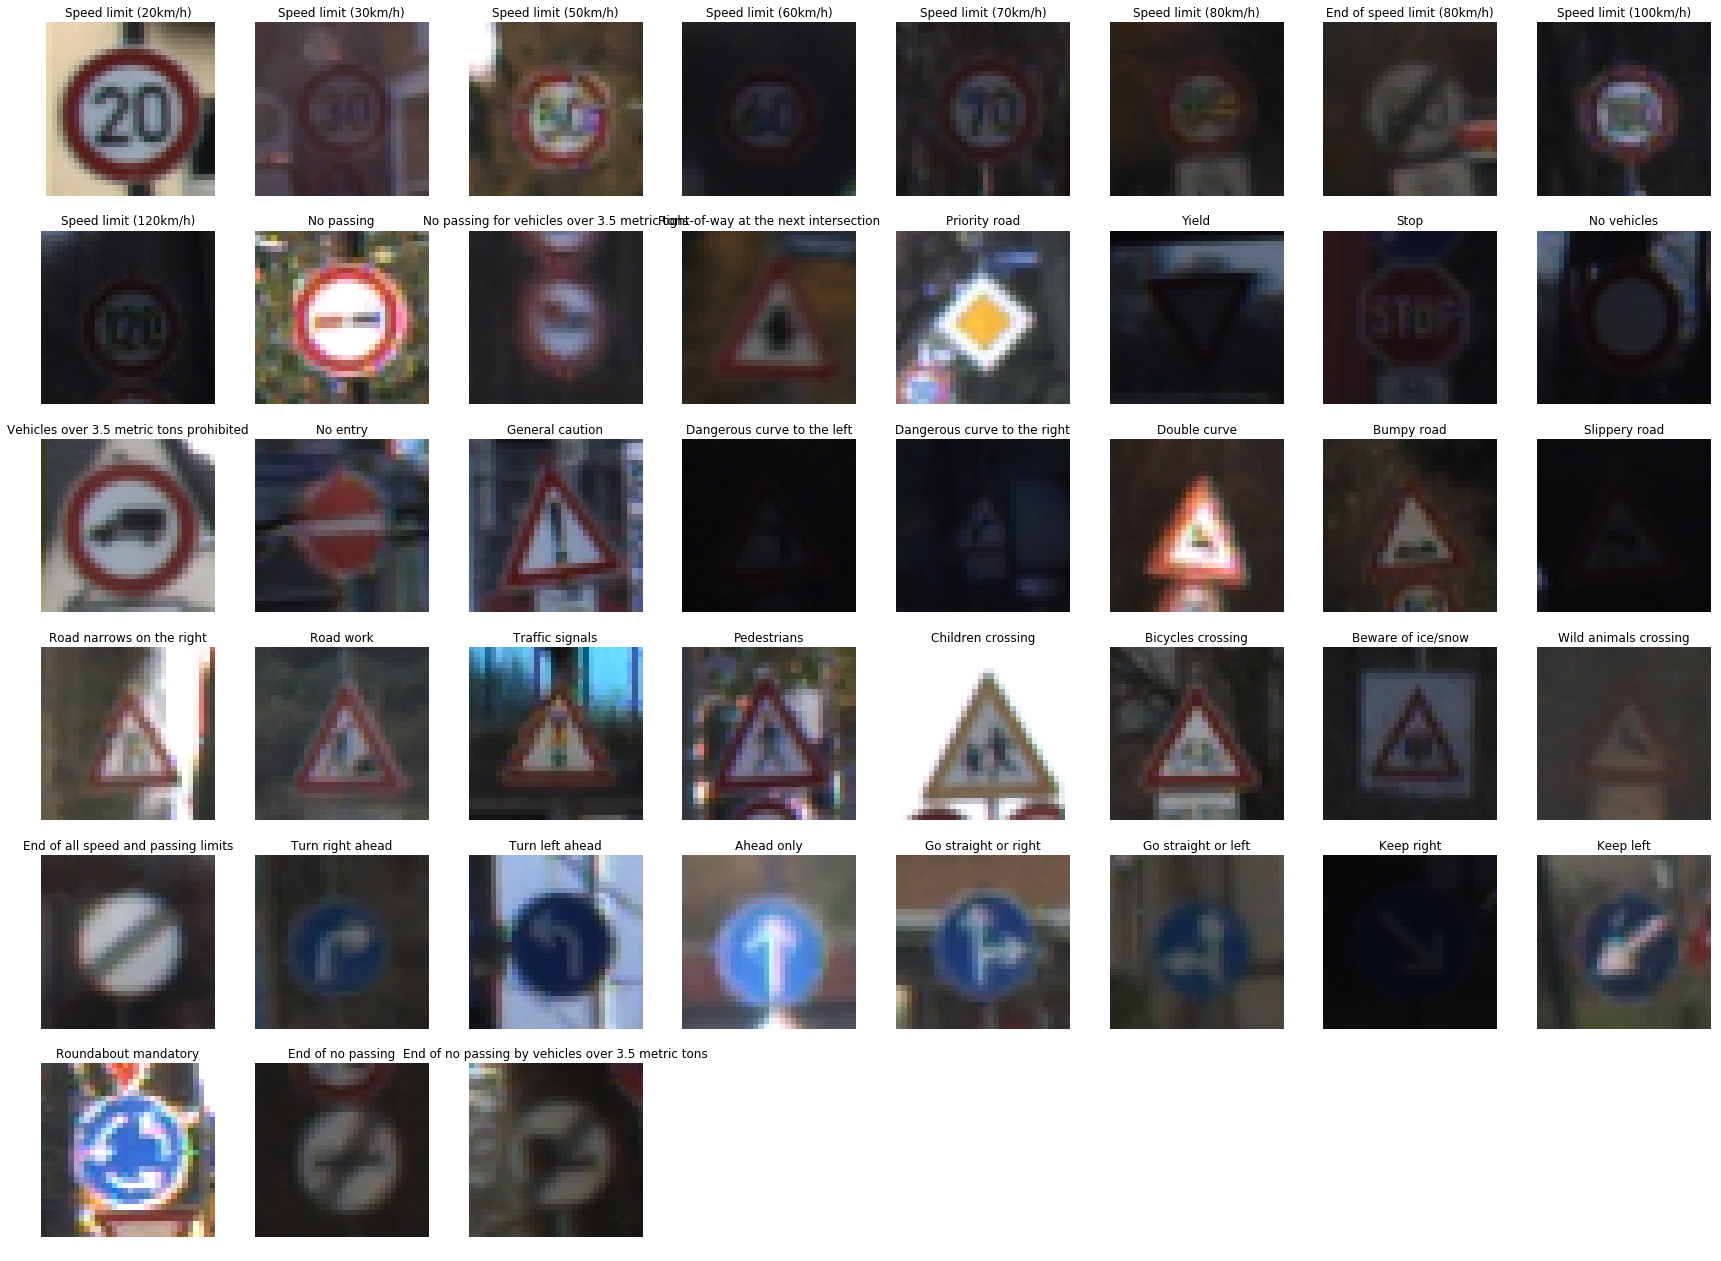

In [6]:
fig = plt.figure(figsize=(30, 30))

labels, unique_indices = np.unique(y_train, return_index=True)
labels_names = list(sign_names['SignName'])

for i, idx in enumerate(unique_indices):
    fig.add_subplot(8, 8, i+1)
    plt.axis('off')
    plt.imshow(X_train[idx])
    plt.title(labels_names[y_train[idx]])
plt.show()

Index 0. Sign name: Speed limit (20km/h). Number of signs: 180


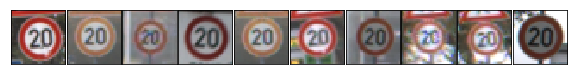

Index 1. Sign name: Speed limit (30km/h). Number of signs: 1980


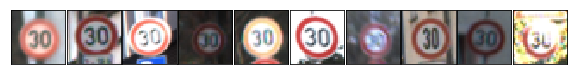

Index 2. Sign name: Speed limit (50km/h). Number of signs: 2010


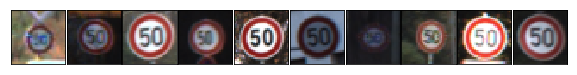

Index 3. Sign name: Speed limit (60km/h). Number of signs: 1260


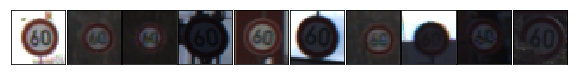

Index 4. Sign name: Speed limit (70km/h). Number of signs: 1770


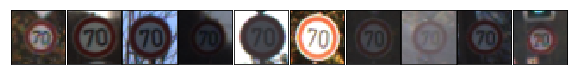

Index 5. Sign name: Speed limit (80km/h). Number of signs: 1650


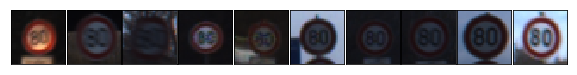

Index 6. Sign name: End of speed limit (80km/h). Number of signs: 360


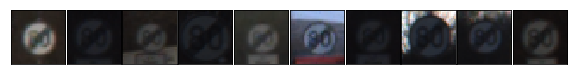

Index 7. Sign name: Speed limit (100km/h). Number of signs: 1290


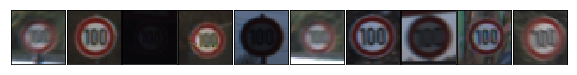

Index 8. Sign name: Speed limit (120km/h). Number of signs: 1260


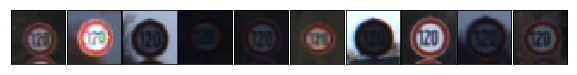

Index 9. Sign name: No passing. Number of signs: 1320


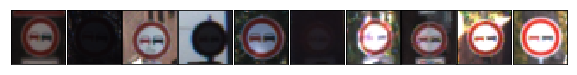

Index 10. Sign name: No passing for vehicles over 3.5 metric tons. Number of signs: 1800


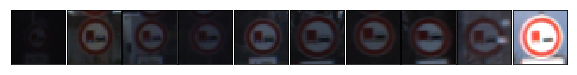

Index 11. Sign name: Right-of-way at the next intersection. Number of signs: 1170


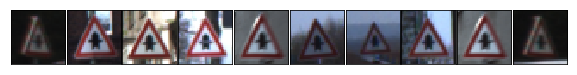

Index 12. Sign name: Priority road. Number of signs: 1890


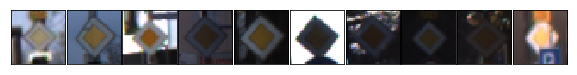

Index 13. Sign name: Yield. Number of signs: 1920


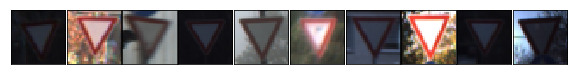

Index 14. Sign name: Stop. Number of signs: 690


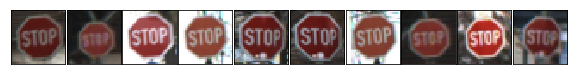

Index 15. Sign name: No vehicles. Number of signs: 540


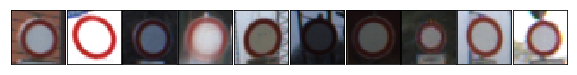

Index 16. Sign name: Vehicles over 3.5 metric tons prohibited. Number of signs: 360


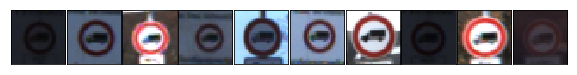

Index 17. Sign name: No entry. Number of signs: 990


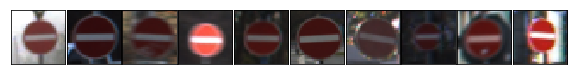

Index 18. Sign name: General caution. Number of signs: 1080


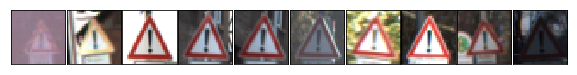

Index 19. Sign name: Dangerous curve to the left. Number of signs: 180


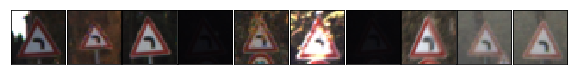

Index 20. Sign name: Dangerous curve to the right. Number of signs: 300


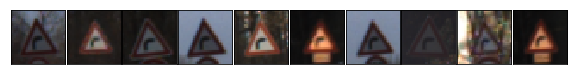

Index 21. Sign name: Double curve. Number of signs: 270


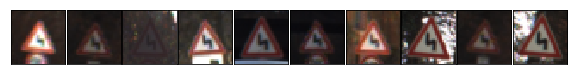

Index 22. Sign name: Bumpy road. Number of signs: 330


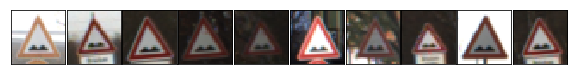

Index 23. Sign name: Slippery road. Number of signs: 450


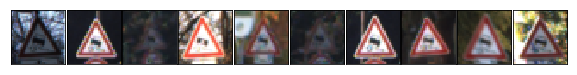

Index 24. Sign name: Road narrows on the right. Number of signs: 240


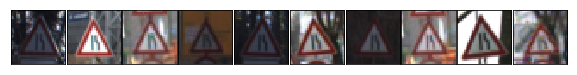

Index 25. Sign name: Road work. Number of signs: 1350


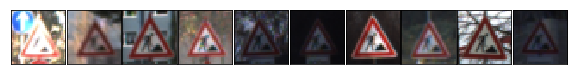

Index 26. Sign name: Traffic signals. Number of signs: 540


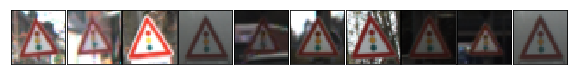

Index 27. Sign name: Pedestrians. Number of signs: 210


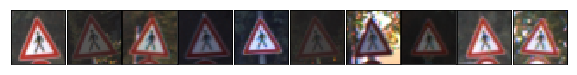

Index 28. Sign name: Children crossing. Number of signs: 480


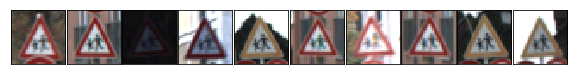

Index 29. Sign name: Bicycles crossing. Number of signs: 240


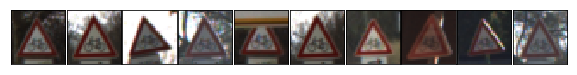

Index 30. Sign name: Beware of ice/snow. Number of signs: 390


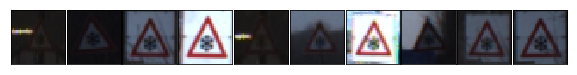

Index 31. Sign name: Wild animals crossing. Number of signs: 690


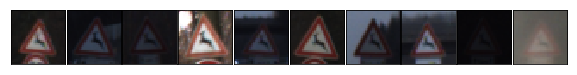

Index 32. Sign name: End of all speed and passing limits. Number of signs: 210


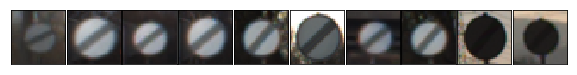

Index 33. Sign name: Turn right ahead. Number of signs: 599


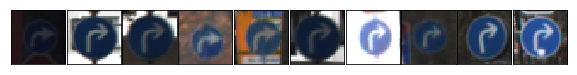

Index 34. Sign name: Turn left ahead. Number of signs: 360


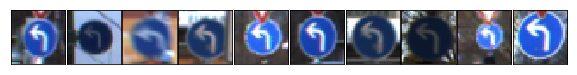

Index 35. Sign name: Ahead only. Number of signs: 1080


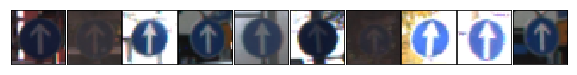

Index 36. Sign name: Go straight or right. Number of signs: 330


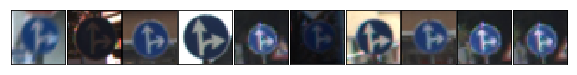

Index 37. Sign name: Go straight or left. Number of signs: 180


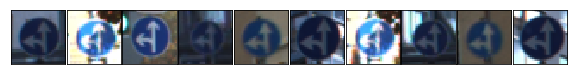

Index 38. Sign name: Keep right. Number of signs: 1860


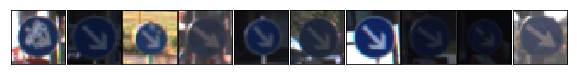

Index 39. Sign name: Keep left. Number of signs: 270


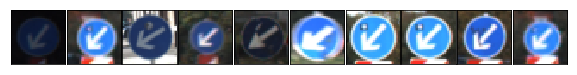

Index 40. Sign name: Roundabout mandatory. Number of signs: 300


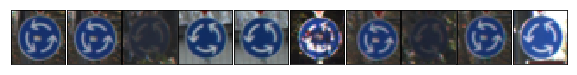

Index 41. Sign name: End of no passing. Number of signs: 210


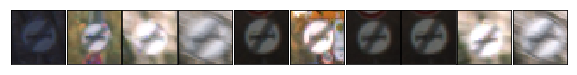

Index 42. Sign name: End of no passing by vehicles over 3.5 metric tons. Number of signs: 210


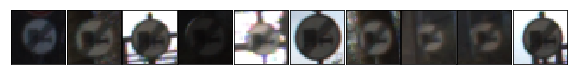

In [7]:
import random

def display_images(Xd, yd, labels_names, num_display=10, squeeze=False, cmap=None):
    samples_per_class = np.bincount(yd)
    for i, label in enumerate(labels_names):
        print("Index {0}. Sign name: {1}. Number of signs: {2}".format(i, label, samples_per_class[i]))
        samples = random.sample(list(np.where(yd==i)[0]), num_display)
        fig = plt.figure(figsize=(num_display, 1))
        fig.subplots_adjust(hspace=0, wspace=0)
        for j, idx in enumerate(samples):
            img = Xd[idx]
            axis = fig.add_subplot(1, num_display, j+1, xticks=[], yticks=[])
            if squeeze and cmap:
                axis.imshow(img.squeeze(), cmap=cmap)
            else:
                axis.imshow(img)
        plt.show()

display_images(X_train, y_train, labels_names)

## Image Transformation

**Translate**
$$\texttt{dst} (x,y) =  \texttt{src} ( \texttt{M} _{11} x +  \texttt{M} _{12} y +  \texttt{M} _{13}, \texttt{M} _{21} x +  \texttt{M} _{22} y +  \texttt{M} _{23})$$

In [8]:
import cv2
from itertools import compress
class ImageEffect:
    """A combinations of image manipulation methods to augment dataset.
    
    The effects include: translation, rotation, shear, blur, gamma.
    Source: @eqbal, https://li8bot.wordpress.com/2014/07/21/opencvpythonpart3-geometric-transformations-2/
    
    Attributes:
        image: feed in the image that can be transformed
    """
    
    def randomize(self, image, show=False):
        """Randomize the effects on the input image
        """
        lottery = np.random.randint(0, 2, [5]).astype('bool')
        types = ["Translate", "Rotate", "Shear", "Blur", "Gamma"]
        
        if lottery[0]:
            image = self.translate(image)
        if lottery[1]:
            image = self.rotate(image)
        if lottery[2]:
            image = self.shear(image)
        if lottery[3]:
            image = self.blur(image)
        if lottery[4]:
            image = self.gamma(image)
            
        return list(compress(types, lottery)), image
    
    def translate(self, image, show=False):
        """Translate
        """
        y, x, channel = image.shape
        # Shift along the y-axis up to 30%. Shift along the x-axis up to 30%
        y_shift, x_shift = np.random.uniform(-0.3*y, 0.3*y), np.random.uniform(-0.3*x, 0.3*x)
        if show:
            print("y-axis:", y_shift, "x-axis:", x_shift)
        M = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
        dst = cv2.warpAffine(image, M, (x, y))
        return dst
        
    def rotate(self, image, show=False, rotate_degree=90):
        """Rotate
        """
        y, x, channel = image.shape
        # Rotate it by 90 degrees anticlockwise. Scale factor = 1, similar to original
        # (x/2, y/2) : center of the rotation in the source image
        M = cv2.getRotationMatrix2D((x/2, y/2), rotate_degree, 1)
        if show:
            print(M)
        dst = cv2.warpAffine(image, M, (x, y))
        return dst
    
    def shear(self, image):
        """Shear. Keep parallel lines together.
        """
        y, x, channel = image.shape
        pts1 = np.float32([[5,5],[20,5],[5,20]])
        
        shear = np.random.randint(5, 15)
        target1 = 5 + shear * np.random.uniform() - shear/2
        target2 = 20 + shear * np.random.uniform() - shear/2
        pts2 = np.float32([[target1,5],[target2,target1],[5,target2]])
        
        # Calculates an affine transform from three pairs of the corresponding points
        # src – Coordinates of triangle vertices in the source image.
        # dst – Coordinates of the corresponding triangle vertices in the destination image.
        M = cv2.getAffineTransform(pts1, pts2)
        dst = cv2.warpAffine(image, M, (x, y))
        return dst
    
    def blur(self, image):
        """Blur/Normalize
        """
        dst = cv2.GaussianBlur(image, (5, 5), 0)
        return dst
    
    def gamma(self, image, gamma=1.5, show=False):
        """Gamma Correction. Brighten the image. 
        
        Source : https://www.pyimagesearch.com/2015/10/05/opencv-gamma-correction/
        
        """
        if np.mean(image) < 50:
            gamma *= 3 # Triple gamma correction for dark images
        if show:
            print(np.mean(image), gamma)
        # Build a lookup table mapping the pixel values [0, 255] to their adjusted gamma values
        # All we need to do is scale the pixel intensities to the range [0, 1.0], apply the transform, and then scale back to the range [0, 255]
        invGamma = 1.0 / gamma
        table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

        # Apply gamma correction using the lookup table
        dst = cv2.LUT(image, table)
        return dst

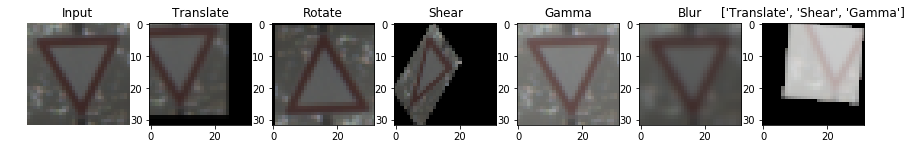

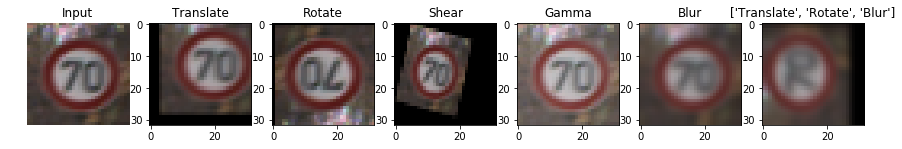

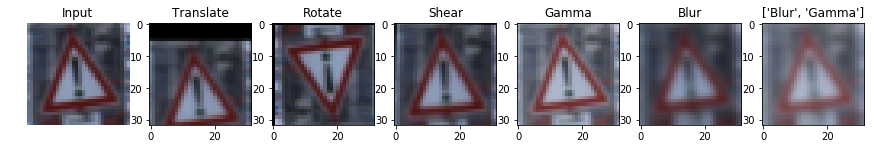

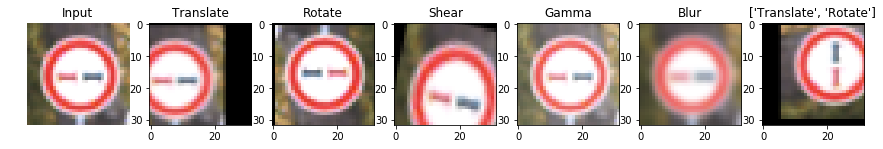

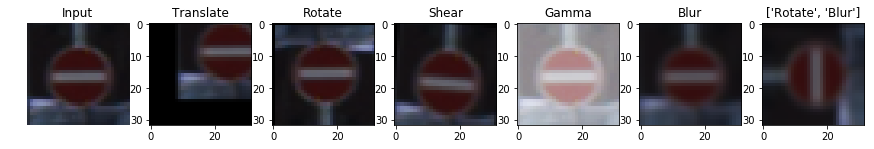

In [9]:
transform = ImageEffect()
for _ in range(5):
    samp = X_train[np.random.randint(n_train)]
    dst_translate = transform.translate(samp)
    dst_rotate = transform.rotate(samp, rotate_degree=180)
    dst_shear = transform.shear(samp)
    dst_gamma = transform.gamma(samp)
    dst_gb = transform.blur(samp)
    random_types, dst_random = transform.randomize(samp)
    plt.figure(figsize=(15, 15))
    plt.subplot(171), plt.imshow(samp), plt.axis('off'), plt.title('Input')
    plt.subplot(172), plt.imshow(dst_translate), plt.title('Translate')
    plt.subplot(173), plt.imshow(dst_rotate), plt.title('Rotate')
    plt.subplot(174), plt.imshow(dst_shear), plt.title('Shear')
    plt.subplot(175), plt.imshow(dst_gamma), plt.title('Gamma')
    plt.subplot(176), plt.imshow(dst_gb), plt.title('Blur')
    plt.subplot(177), plt.imshow(dst_random), plt.title(random_types)
plt.show()

**num_new_img = num_img $*$ scale_factor $*$ (avg / num_img)**

In [10]:
def augment_dataset(Xd, yd, scale_factor, output_path=None, shuffle=False, show=False):
    """Augment training dataset and pickle the file
    """
    n_classes = len(set(yd))
    class_idxs, images_per_class = np.unique(yd, return_counts=True)
    avg = np.ceil(np.mean(images_per_class, axis=0)).astype('uint32')
    if show:
        print("Average = ", avg)
    
    # Separate images into classes
    sep_data = []
    for idx in class_idxs:
        sep_data.append(Xd[yd==idx])
    
    expanded_Xd = np.array(np.zeros((1, 32, 32, 3)))
    expanded_yd = np.array([0])
    
    # For each class of image, calculate the number of new_images to add.
    # Then for each image, generate that many pseudo images
    transform = ImageEffect()
    for idx, orig_images in enumerate(sep_data):
        new_images = []
        factor = (scale_factor * (avg / len(orig_images))).astype('uint32')
        for img in orig_images:
            for _ in range(factor):
                new_images.append(transform.randomize(img)[1])
        if show:
            print("For class idx = {0}, factor = {1}, number of original images = {2}, number of new images added = {3}".format(idx, factor, len(orig_images), len(new_images)))
        if len(new_images) > 0:
            orig_images = np.concatenate((orig_images, new_images), axis=0)
        new_labels = np.full(len(orig_images), idx, dtype='uint8')
        expanded_Xd = np.concatenate((expanded_Xd, orig_images), axis=0)
        expanded_yd = np.concatenate((expanded_yd, new_labels), axis=0)
        
    if shuffle:
        from random import shuffle
        ind_list = [i for i in range(1, len(expanded_Xd))]
        shuffle(ind_list)
        return expanded_Xd[ind_list], expanded_yd[ind_list]
    else:
        return expanded_Xd[1:], expanded_yd[1:]  
    
expanded_X_train, expanded_y_train = augment_dataset(X_train, y_train, 2, show=True, shuffle=True)

Average =  810
For class idx = 0, factor = 9, number of original images = 180, number of new images added = 1620
For class idx = 1, factor = 0, number of original images = 1980, number of new images added = 0
For class idx = 2, factor = 0, number of original images = 2010, number of new images added = 0
For class idx = 3, factor = 1, number of original images = 1260, number of new images added = 1260
For class idx = 4, factor = 0, number of original images = 1770, number of new images added = 0
For class idx = 5, factor = 0, number of original images = 1650, number of new images added = 0
For class idx = 6, factor = 4, number of original images = 360, number of new images added = 1440
For class idx = 7, factor = 1, number of original images = 1290, number of new images added = 1290
For class idx = 8, factor = 1, number of original images = 1260, number of new images added = 1260
For class idx = 9, factor = 1, number of original images = 1320, number of new images added = 1320
For class

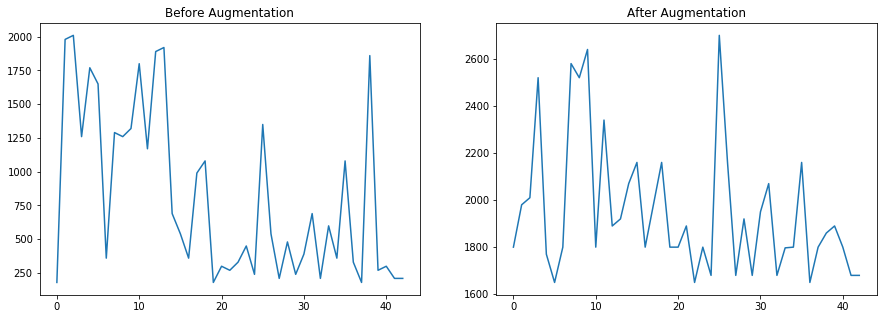

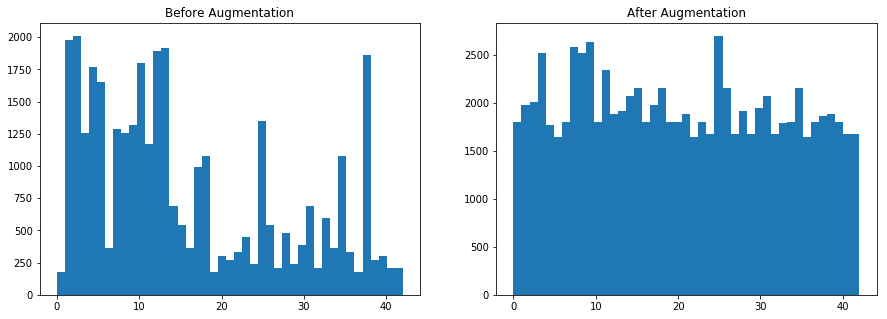

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(121), plt.plot(np.bincount(y_train)), plt.title('Before Augmentation')
plt.subplot(122), plt.plot(np.bincount(expanded_y_train)), plt.title('After Augmentation')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(121), plt.hist(y_train, bins=n_classes), plt.title('Before Augmentation')
plt.subplot(122), plt.hist(expanded_y_train, bins=n_classes), plt.title('After Augmentation')
plt.show()

## PyTorch

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import copy
import time

import torch.utils.data as data_utils

traffic_train = data_utils.TensorDataset(torch.from_numpy(np.transpose(expanded_X_train, (0,3,1,2))), torch.from_numpy(expanded_y_train))
loader_train = data_utils.DataLoader(traffic_train, batch_size=64, shuffle=True)
traffic_val = data_utils.TensorDataset(torch.from_numpy(np.transpose(X_valid, (0,3,1,2))), torch.from_numpy(y_valid))
loader_val = data_utils.DataLoader(traffic_val, batch_size=64, shuffle=True)
traffic_test = data_utils.TensorDataset(torch.from_numpy(np.transpose(X_test, (0,3,1,2))), torch.from_numpy(y_test))
loader_test = data_utils.DataLoader(traffic_test, batch_size=64, shuffle=True)

In [13]:
print(expanded_X_train.shape)
from torchvision import transforms as T
preprocess = T.Compose(
    [T.ToTensor(),
     T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
tensor = preprocess(expanded_X_train[5])
print(tensor.size())

(83967, 32, 32, 3)
torch.Size([3, 32, 32])


In [14]:
torch.cuda.is_available()

True

In [14]:
print(np.transpose(expanded_X_train, (0,3,1,2)).shape)

(83967, 3, 32, 32)


In [71]:
print_every = 100

# This is a little utility that we'll use to reset the model
# if we want to re-initialize all our parameters
def reset(m):
    if hasattr(m, 'reset_parameters'):
        m.reset_parameters()

class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image
    
fixed_model_base = nn.Sequential(
                nn.Conv2d(3, 32, kernel_size=7, stride=1),
                nn.ReLU(inplace=True),
                nn.BatchNorm2d(32),
                nn.MaxPool2d(2, stride=2), # Maintain the dimension
                Flatten(), # Flatten the NxWxHxC to Nx(WHC) to feed through the affine layer
                nn.Linear(5408, 1024),
                nn.ReLU(inplace=True),
                nn.Linear(1024, n_classes), # affine layer
            )

lenet = 

gpu_dtype = torch.cuda.FloatTensor

fixed_model_gpu = fixed_model_base.type(gpu_dtype)

x_var_gpu = torch.randn(64, 3, 32, 32).type(gpu_dtype)
ans = fixed_model_gpu(Variable(x_var_gpu))        # Feed it through the model! 

print(x_var_gpu.size(), ans.size())

torch.Size([64, 3, 32, 32]) torch.Size([64, 43])


In [15]:
import torch.nn.functional as F

class Block(nn.Module):
    '''Depthwise conv + Pointwise conv'''
    def __init__(self, in_planes, out_planes, stride=1):
        super(Block, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, in_planes, kernel_size=3, stride=stride, padding=1, groups=in_planes, bias=False)
        self.bn1 = nn.BatchNorm2d(in_planes)
        self.conv2 = nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=1, padding=0, bias=False)
        self.bn2 = nn.BatchNorm2d(out_planes)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        return out


class MobileNet(nn.Module):
    # (128,2) means conv planes=128, conv stride=2, by default conv stride=1
    cfg = [64, (128,2), 128, (256,2), 256, (512,2), 512, 512, 512, 512, 512, (1024,2), 1024]

    def __init__(self, num_classes=10):
        super(MobileNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.layers = self._make_layers(in_planes=32)
        self.linear = nn.Linear(1024, n_classes)

    def _make_layers(self, in_planes):
        layers = []
        for x in self.cfg:
            out_planes = x if isinstance(x, int) else x[0]
            stride = 1 if isinstance(x, int) else x[1]
            layers.append(Block(in_planes, out_planes, stride))
            in_planes = out_planes
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layers(out)
        out = F.avg_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

In [18]:
print_every = 100

def reset(m):
    if hasattr(m, 'reset_parameters'):
        m.reset_parameters()

def check_accuracy(model, loader):
    num_correct = 0
    num_samples = 0
    model.eval() # Put the model in test mode (the opposite of model.train(), essentially)
    for x, y in loader:
        x_var = Variable(x.float().cuda(), volatile=True)
        scores = model(x_var)
        _, preds = scores.data.cpu().max(1)
        num_correct += (preds == y).sum()
        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
    
def train(model, loss_fn, optimizer, num_epochs = 1, plot=True):
    reset(model)
    best_acc = 0.0
    best_model = model
    
    for epoch in range(num_epochs):
        print('Starting epoch %d / %d' % (epoch + 1, num_epochs))
        model.train()
        
        running_loss = 0.0
        running_corrects = 0
        losses = []
        accuracies = []
        num_samples = 0
            
        for t, (x, y) in enumerate(loader_train):
            x_var = Variable(x.float().cuda())
            y_var = Variable(y.long().cuda())
            

            scores = model(x_var)
            _, preds = torch.max(scores.data, 1)
            loss = loss_fn(scores, y_var)
            
            batch_size = preds.size(0)
            batch_loss = loss.data[0]
            batch_corrects = torch.sum(preds == y_var.data)
            batch_acc = batch_corrects / batch_size
            
            losses.append(batch_loss)
            accuracies.append(batch_acc)
            running_loss += batch_loss * batch_size
            running_corrects += batch_corrects
            
            num_samples += batch_size
            
            if (t + 1) % print_every == 0:
                print('t = %d, loss = %.4f, acc = %.4f' % (t + 1, batch_loss, batch_acc))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        epoch_loss = running_loss / num_samples
        epoch_acc = running_corrects / num_samples

        print('Epoch {}, Overall Loss: {:.4f} and Accuracy: {:.4f}'.format(epoch+1, epoch_loss, epoch_acc))
        print('Validation:')
        check_accuracy(model, loader_val)

        if plot:
            fig, ax = plt.subplots(figsize=(10, 5))
            plt.grid(True)

            line1, = ax.plot(losses, label='Losses')
            line2, = ax.plot(accuracies, label='Accuracy')

            ax.legend(loc='lower right')
            plt.title('Epoch {} Loss'.format(epoch+1))
            plt.xlabel('Minibatch Number')
            plt.show()
        
        if epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model = copy.deepcopy(model) # Update the best model
            
    return best_model

Starting epoch 1 / 20
t = 100, loss = 3.4563, acc = 0.0625
t = 200, loss = 2.8113, acc = 0.1094
t = 300, loss = 2.6752, acc = 0.2031
t = 400, loss = 2.4206, acc = 0.2656
t = 500, loss = 1.9670, acc = 0.3438
t = 600, loss = 2.1768, acc = 0.3125
t = 700, loss = 1.7866, acc = 0.4375
t = 800, loss = 1.7723, acc = 0.4844
t = 900, loss = 1.7935, acc = 0.4531
t = 1000, loss = 1.0516, acc = 0.7344
t = 1100, loss = 1.2904, acc = 0.5938
t = 1200, loss = 1.0998, acc = 0.6406
t = 1300, loss = 1.0026, acc = 0.6094
Epoch 1, Overall Loss: 2.0358 and Accuracy: 0.3735
Validation:
Got 3607 / 4410 correct (81.79)


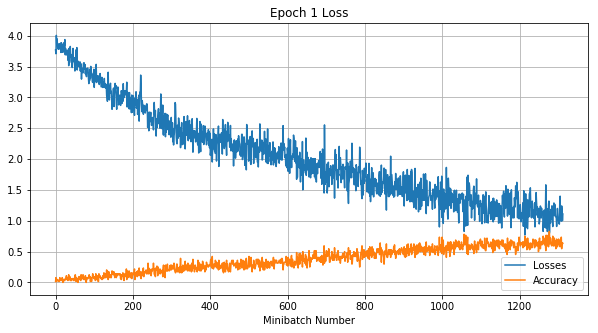

Starting epoch 2 / 20
t = 100, loss = 0.8939, acc = 0.6875
t = 200, loss = 0.7329, acc = 0.7031
t = 300, loss = 1.1112, acc = 0.6562
t = 400, loss = 1.0010, acc = 0.7188
t = 500, loss = 0.8503, acc = 0.7812
t = 600, loss = 0.8033, acc = 0.7188
t = 700, loss = 0.6322, acc = 0.7656
t = 800, loss = 0.6606, acc = 0.8281
t = 900, loss = 0.6028, acc = 0.8281
t = 1000, loss = 0.7124, acc = 0.7656
t = 1100, loss = 0.7752, acc = 0.7812
t = 1200, loss = 0.8448, acc = 0.7344
t = 1300, loss = 0.5050, acc = 0.8438
Epoch 2, Overall Loss: 0.7766 and Accuracy: 0.7560
Validation:
Got 3624 / 4410 correct (82.18)


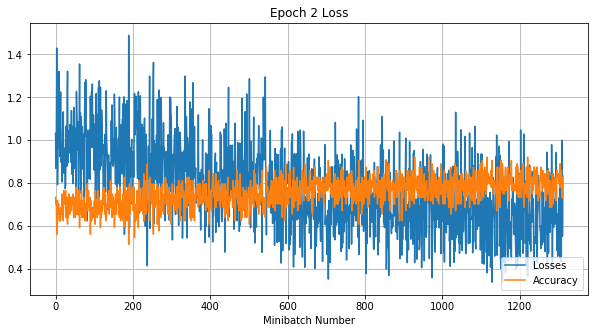

Starting epoch 3 / 20
t = 100, loss = 0.4355, acc = 0.8281
t = 200, loss = 0.3712, acc = 0.8906
t = 300, loss = 0.4559, acc = 0.8750
t = 400, loss = 0.4566, acc = 0.8438
t = 500, loss = 0.6149, acc = 0.8125
t = 600, loss = 0.6521, acc = 0.7969
t = 700, loss = 0.4479, acc = 0.8281
t = 800, loss = 0.6572, acc = 0.8281
t = 900, loss = 0.4958, acc = 0.7969
t = 1000, loss = 0.3204, acc = 0.9219
t = 1100, loss = 0.4180, acc = 0.8750
t = 1200, loss = 0.4574, acc = 0.8750
t = 1300, loss = 0.3242, acc = 0.8750
Epoch 3, Overall Loss: 0.5391 and Accuracy: 0.8346
Validation:
Got 3724 / 4410 correct (84.44)


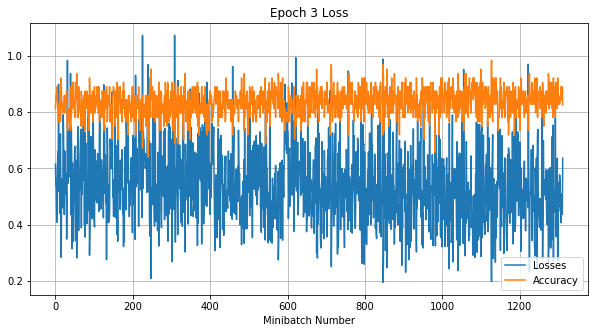

Starting epoch 4 / 20
t = 100, loss = 0.6240, acc = 0.8281
t = 200, loss = 0.3958, acc = 0.8750
t = 300, loss = 0.3326, acc = 0.9062
t = 400, loss = 0.4583, acc = 0.8281
t = 500, loss = 0.4687, acc = 0.8438
t = 600, loss = 0.4104, acc = 0.8906
t = 700, loss = 0.5867, acc = 0.8594
t = 800, loss = 0.3366, acc = 0.9062
t = 900, loss = 0.4196, acc = 0.8438
t = 1000, loss = 0.5793, acc = 0.8281
t = 1100, loss = 0.3767, acc = 0.8906
t = 1200, loss = 0.5396, acc = 0.8594
t = 1300, loss = 0.5191, acc = 0.8438
Epoch 4, Overall Loss: 0.4710 and Accuracy: 0.8596
Validation:
Got 3966 / 4410 correct (89.93)


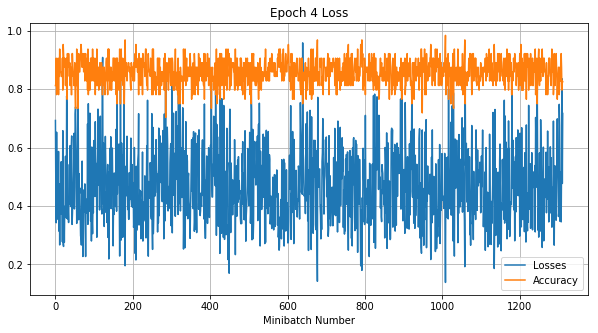

Starting epoch 5 / 20
t = 100, loss = 0.4228, acc = 0.8594
t = 200, loss = 0.4155, acc = 0.8750
t = 300, loss = 0.3604, acc = 0.9062
t = 400, loss = 0.5872, acc = 0.8281
t = 500, loss = 0.4605, acc = 0.8750
t = 600, loss = 0.6622, acc = 0.8125
t = 700, loss = 0.2856, acc = 0.9219
t = 800, loss = 0.3291, acc = 0.8906
t = 900, loss = 0.4663, acc = 0.8594
t = 1000, loss = 0.3179, acc = 0.8750
t = 1100, loss = 0.6888, acc = 0.7656
t = 1200, loss = 0.5694, acc = 0.8594
t = 1300, loss = 0.7547, acc = 0.7812
Epoch 5, Overall Loss: 0.4523 and Accuracy: 0.8646
Validation:
Got 3602 / 4410 correct (81.68)


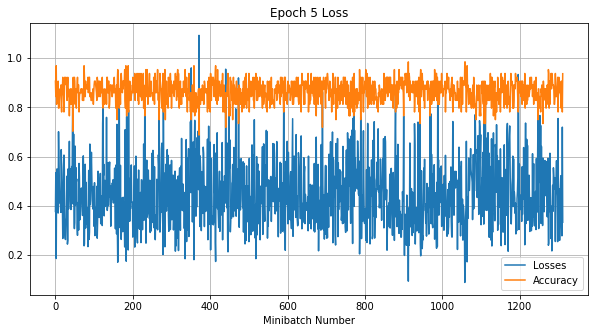

Starting epoch 6 / 20
t = 100, loss = 0.3948, acc = 0.8750
t = 200, loss = 0.3286, acc = 0.9062
t = 300, loss = 0.3983, acc = 0.8594
t = 400, loss = 0.4458, acc = 0.8281
t = 500, loss = 0.4225, acc = 0.8594
t = 600, loss = 0.3605, acc = 0.8906
t = 700, loss = 0.5802, acc = 0.8750
t = 800, loss = 0.2319, acc = 0.9688
t = 900, loss = 0.4561, acc = 0.8438
t = 1000, loss = 0.2503, acc = 0.9062
t = 1100, loss = 0.4775, acc = 0.8438
t = 1200, loss = 0.4470, acc = 0.8438
t = 1300, loss = 0.3920, acc = 0.8594
Epoch 6, Overall Loss: 0.4397 and Accuracy: 0.8697
Validation:
Got 3535 / 4410 correct (80.16)


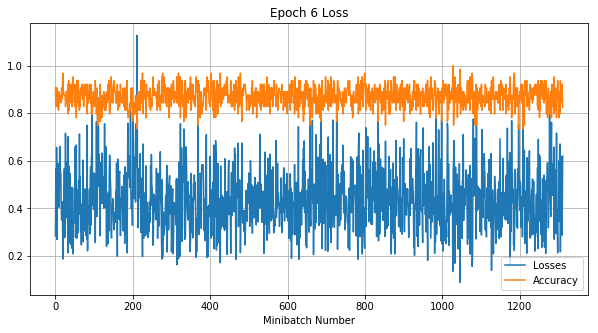

Starting epoch 7 / 20
t = 100, loss = 0.4199, acc = 0.9219
t = 200, loss = 0.6403, acc = 0.8281
t = 300, loss = 0.3335, acc = 0.8906
t = 400, loss = 0.3578, acc = 0.9062
t = 500, loss = 0.3155, acc = 0.9219
t = 600, loss = 0.6709, acc = 0.7969
t = 700, loss = 0.5631, acc = 0.7969
t = 800, loss = 0.3162, acc = 0.8750
t = 900, loss = 0.4005, acc = 0.9062
t = 1000, loss = 0.3908, acc = 0.9062
t = 1100, loss = 0.5495, acc = 0.8281
t = 1200, loss = 0.4705, acc = 0.8750
t = 1300, loss = 0.3813, acc = 0.8906
Epoch 7, Overall Loss: 0.4288 and Accuracy: 0.8736
Validation:
Got 3899 / 4410 correct (88.41)


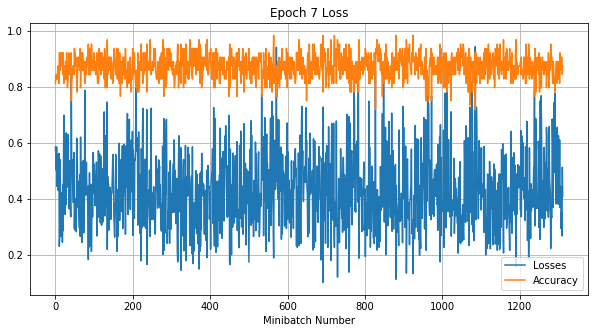

Starting epoch 8 / 20
t = 100, loss = 0.4401, acc = 0.8594
t = 200, loss = 0.5286, acc = 0.8438
t = 300, loss = 0.3532, acc = 0.9062
t = 400, loss = 0.5115, acc = 0.8281
t = 500, loss = 0.2860, acc = 0.9062
t = 600, loss = 0.3424, acc = 0.8906
t = 700, loss = 0.3475, acc = 0.9062
t = 800, loss = 0.2276, acc = 0.9062
t = 900, loss = 0.4394, acc = 0.8438
t = 1000, loss = 0.4561, acc = 0.8438
t = 1100, loss = 0.3692, acc = 0.8594
t = 1200, loss = 0.3974, acc = 0.8594
t = 1300, loss = 0.5469, acc = 0.8125
Epoch 8, Overall Loss: 0.4279 and Accuracy: 0.8737
Validation:
Got 4053 / 4410 correct (91.90)


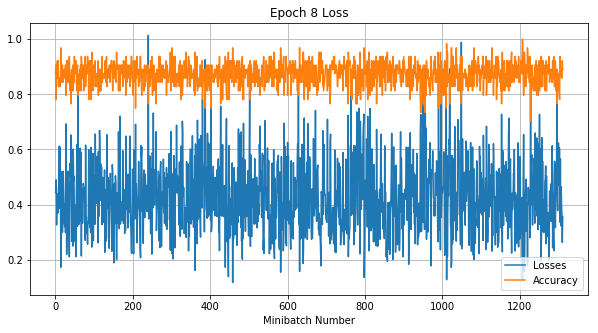

Starting epoch 9 / 20
t = 100, loss = 0.3463, acc = 0.8594
t = 200, loss = 0.5528, acc = 0.8438
t = 300, loss = 0.3003, acc = 0.9219
t = 400, loss = 0.3419, acc = 0.9062
t = 500, loss = 0.3368, acc = 0.8750
t = 600, loss = 0.4375, acc = 0.8750
t = 700, loss = 0.3590, acc = 0.9219
t = 800, loss = 0.3378, acc = 0.8750
t = 900, loss = 0.5020, acc = 0.8438
t = 1000, loss = 0.5712, acc = 0.8906
t = 1100, loss = 0.3613, acc = 0.9219
t = 1200, loss = 0.2810, acc = 0.9219
t = 1300, loss = 0.5254, acc = 0.8125
Epoch 9, Overall Loss: 0.4186 and Accuracy: 0.8764
Validation:
Got 3771 / 4410 correct (85.51)


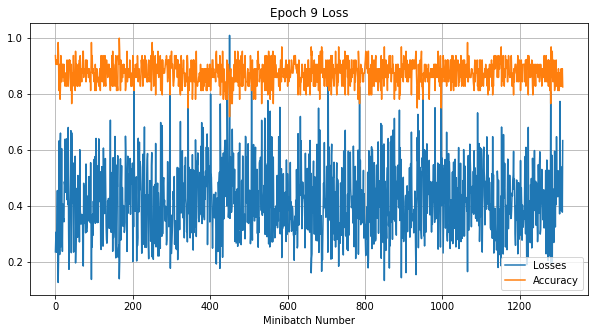

Starting epoch 10 / 20
t = 100, loss = 0.2882, acc = 0.8750
t = 200, loss = 0.3856, acc = 0.8594
t = 300, loss = 0.4262, acc = 0.8906
t = 400, loss = 0.5706, acc = 0.8594
t = 500, loss = 0.4751, acc = 0.8594
t = 600, loss = 0.2558, acc = 0.9219
t = 700, loss = 0.4245, acc = 0.8594
t = 800, loss = 0.2461, acc = 0.9531
t = 900, loss = 0.2622, acc = 0.9375
t = 1000, loss = 0.4274, acc = 0.8750
t = 1100, loss = 0.4035, acc = 0.8906
t = 1200, loss = 0.3999, acc = 0.8750
t = 1300, loss = 0.2276, acc = 0.9375
Epoch 10, Overall Loss: 0.4208 and Accuracy: 0.8773
Validation:
Got 4154 / 4410 correct (94.20)


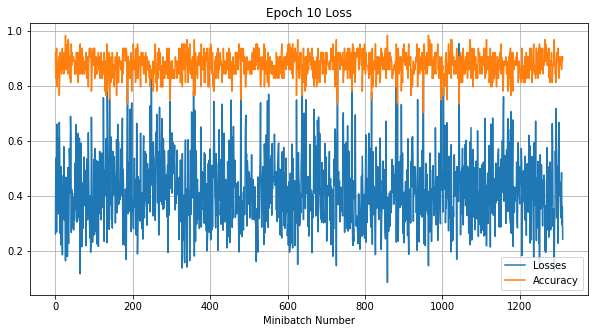

Starting epoch 11 / 20
t = 100, loss = 0.6183, acc = 0.8594
t = 200, loss = 0.4432, acc = 0.8750
t = 300, loss = 0.2785, acc = 0.9375
t = 400, loss = 0.2945, acc = 0.9062
t = 500, loss = 0.5465, acc = 0.8125
t = 600, loss = 0.3126, acc = 0.8906
t = 700, loss = 0.6641, acc = 0.8281
t = 800, loss = 0.4350, acc = 0.8594
t = 900, loss = 0.5153, acc = 0.7969
t = 1000, loss = 0.4312, acc = 0.8750
t = 1100, loss = 0.2679, acc = 0.9219
t = 1200, loss = 0.6300, acc = 0.8438
t = 1300, loss = 0.5059, acc = 0.8438
Epoch 11, Overall Loss: 0.4242 and Accuracy: 0.8751
Validation:
Got 3768 / 4410 correct (85.44)


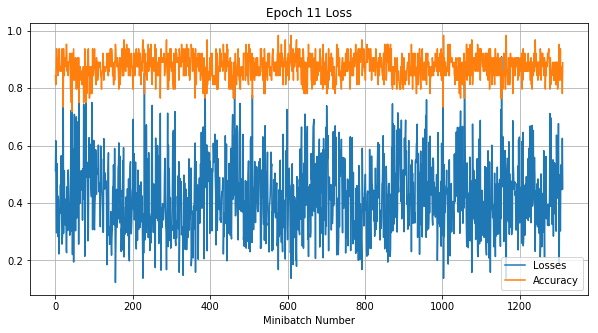

Starting epoch 12 / 20
t = 100, loss = 0.5389, acc = 0.8906
t = 200, loss = 0.1944, acc = 0.9688
t = 300, loss = 0.2354, acc = 0.9375
t = 400, loss = 0.5994, acc = 0.8438
t = 500, loss = 0.3221, acc = 0.8906
t = 600, loss = 0.2943, acc = 0.8906
t = 700, loss = 0.3685, acc = 0.8906
t = 800, loss = 0.4892, acc = 0.8438
t = 900, loss = 0.2614, acc = 0.9375
t = 1000, loss = 0.3723, acc = 0.8906
t = 1100, loss = 0.4897, acc = 0.8750
t = 1200, loss = 0.2567, acc = 0.9219
t = 1300, loss = 0.5687, acc = 0.8438
Epoch 12, Overall Loss: 0.4244 and Accuracy: 0.8759
Validation:
Got 4007 / 4410 correct (90.86)


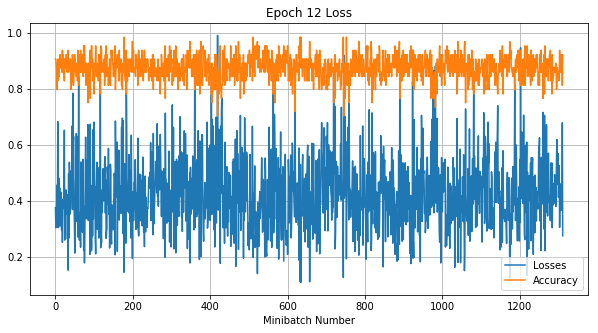

Starting epoch 13 / 20
t = 100, loss = 0.3309, acc = 0.9219
t = 200, loss = 0.4487, acc = 0.8438
t = 300, loss = 0.3999, acc = 0.8438
t = 400, loss = 0.2974, acc = 0.9375
t = 500, loss = 0.5275, acc = 0.8281
t = 600, loss = 0.1501, acc = 0.9688
t = 700, loss = 0.4623, acc = 0.8750
t = 800, loss = 0.2600, acc = 0.9219
t = 900, loss = 0.3641, acc = 0.9062
t = 1000, loss = 0.4101, acc = 0.9219
t = 1100, loss = 0.4880, acc = 0.8594
t = 1200, loss = 0.4658, acc = 0.8750
t = 1300, loss = 0.3676, acc = 0.8906
Epoch 13, Overall Loss: 0.4217 and Accuracy: 0.8764
Validation:
Got 3709 / 4410 correct (84.10)


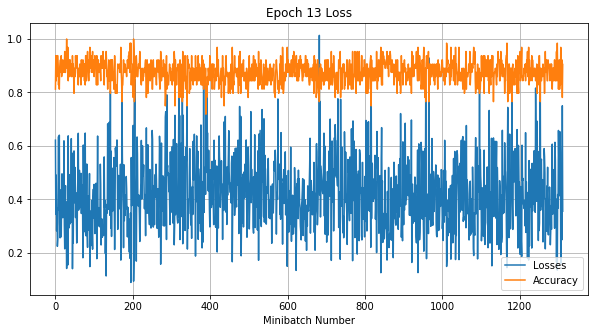

Starting epoch 14 / 20
t = 100, loss = 0.3366, acc = 0.8594
t = 200, loss = 0.4296, acc = 0.8750
t = 300, loss = 0.2696, acc = 0.9219
t = 400, loss = 0.2468, acc = 0.9219
t = 500, loss = 0.3464, acc = 0.9062
t = 600, loss = 0.3943, acc = 0.9062
t = 700, loss = 0.4780, acc = 0.8438
t = 800, loss = 0.3542, acc = 0.9062
t = 900, loss = 0.6130, acc = 0.8281
t = 1000, loss = 0.4188, acc = 0.9062
t = 1100, loss = 0.6276, acc = 0.8281
t = 1200, loss = 0.2624, acc = 0.9062
t = 1300, loss = 0.4321, acc = 0.8906
Epoch 14, Overall Loss: 0.4294 and Accuracy: 0.8733
Validation:
Got 3927 / 4410 correct (89.05)


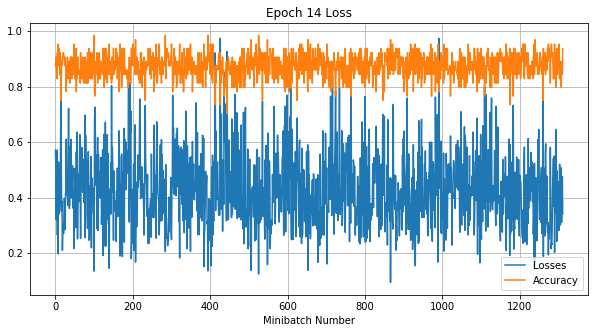

Starting epoch 15 / 20
t = 100, loss = 0.2839, acc = 0.8906
t = 200, loss = 0.5971, acc = 0.8438
t = 300, loss = 0.2934, acc = 0.9219
t = 400, loss = 0.5842, acc = 0.8281
t = 500, loss = 0.2315, acc = 0.9531
t = 600, loss = 0.3161, acc = 0.9375
t = 700, loss = 0.5060, acc = 0.8750
t = 800, loss = 0.4700, acc = 0.8750
t = 900, loss = 0.5295, acc = 0.8438
t = 1000, loss = 0.2176, acc = 0.9531
t = 1100, loss = 0.3141, acc = 0.8906
t = 1200, loss = 0.6552, acc = 0.8125
t = 1300, loss = 0.4583, acc = 0.8281
Epoch 15, Overall Loss: 0.4117 and Accuracy: 0.8802
Validation:
Got 4039 / 4410 correct (91.59)


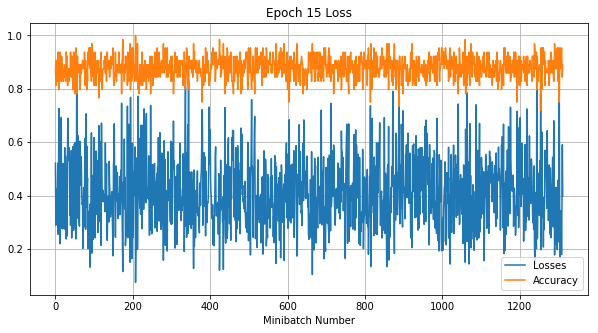

Starting epoch 16 / 20
t = 100, loss = 0.4353, acc = 0.8594
t = 200, loss = 0.2769, acc = 0.9219
t = 300, loss = 0.2313, acc = 0.9375
t = 400, loss = 0.5297, acc = 0.8281
t = 500, loss = 0.2620, acc = 0.8906
t = 600, loss = 0.3076, acc = 0.9375
t = 700, loss = 0.3671, acc = 0.9062
t = 800, loss = 0.3383, acc = 0.9062
t = 900, loss = 0.4641, acc = 0.8594
t = 1000, loss = 0.4189, acc = 0.8594
t = 1100, loss = 0.5594, acc = 0.8438
t = 1200, loss = 0.2723, acc = 0.9219
t = 1300, loss = 0.5062, acc = 0.8594
Epoch 16, Overall Loss: 0.4179 and Accuracy: 0.8785
Validation:
Got 4084 / 4410 correct (92.61)


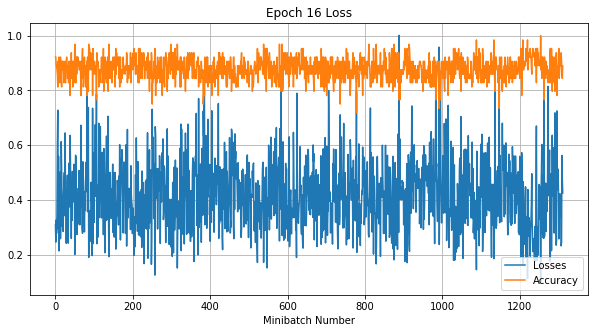

Starting epoch 17 / 20
t = 100, loss = 0.3108, acc = 0.9219
t = 200, loss = 0.1833, acc = 0.9688
t = 300, loss = 0.6313, acc = 0.7969
t = 400, loss = 0.5847, acc = 0.8281
t = 500, loss = 0.4099, acc = 0.8594
t = 600, loss = 0.4562, acc = 0.8594
t = 700, loss = 0.9053, acc = 0.7188
t = 800, loss = 0.5094, acc = 0.8750
t = 900, loss = 0.4248, acc = 0.8438
t = 1000, loss = 0.4624, acc = 0.8594
t = 1100, loss = 0.5641, acc = 0.8281
t = 1200, loss = 0.4917, acc = 0.8438
t = 1300, loss = 0.4852, acc = 0.8438
Epoch 17, Overall Loss: 0.4220 and Accuracy: 0.8779
Validation:
Got 4147 / 4410 correct (94.04)


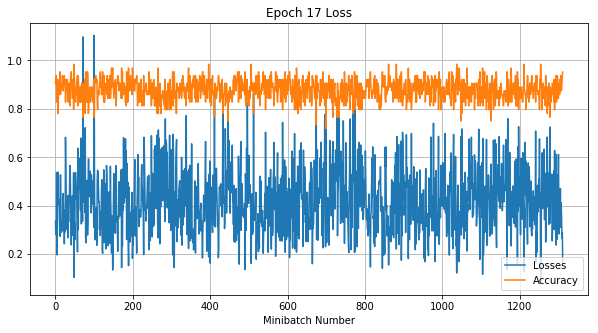

Starting epoch 18 / 20
t = 100, loss = 0.1795, acc = 0.9375
t = 200, loss = 0.4159, acc = 0.8594
t = 300, loss = 0.4139, acc = 0.8594
t = 400, loss = 0.3347, acc = 0.9062
t = 500, loss = 0.5715, acc = 0.8906
t = 600, loss = 0.5795, acc = 0.8438
t = 700, loss = 0.3386, acc = 0.8750
t = 800, loss = 0.5155, acc = 0.8125
t = 900, loss = 0.4365, acc = 0.8438
t = 1000, loss = 0.3824, acc = 0.8906
t = 1100, loss = 0.3049, acc = 0.9219
t = 1200, loss = 0.2270, acc = 0.9219
t = 1300, loss = 0.3358, acc = 0.9375
Epoch 18, Overall Loss: 0.4146 and Accuracy: 0.8789
Validation:
Got 4148 / 4410 correct (94.06)


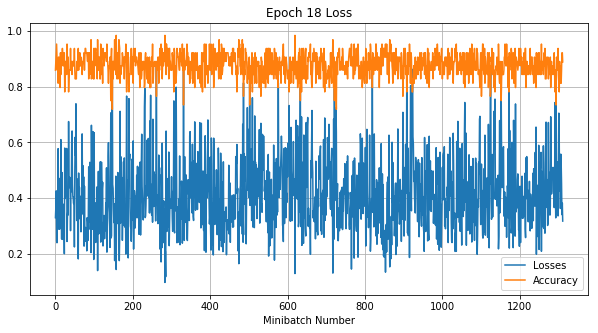

Starting epoch 19 / 20
t = 100, loss = 0.4052, acc = 0.8750
t = 200, loss = 0.2915, acc = 0.9219
t = 300, loss = 0.4654, acc = 0.8750
t = 400, loss = 0.3154, acc = 0.9062
t = 500, loss = 0.3866, acc = 0.8750
t = 600, loss = 0.4617, acc = 0.9219
t = 700, loss = 0.3298, acc = 0.8906
t = 800, loss = 0.7022, acc = 0.7969
t = 900, loss = 0.3999, acc = 0.9062
t = 1000, loss = 0.4065, acc = 0.8750
t = 1100, loss = 0.4229, acc = 0.8750
t = 1200, loss = 0.6148, acc = 0.8125
t = 1300, loss = 0.7163, acc = 0.7969
Epoch 19, Overall Loss: 0.4107 and Accuracy: 0.8799
Validation:
Got 4140 / 4410 correct (93.88)


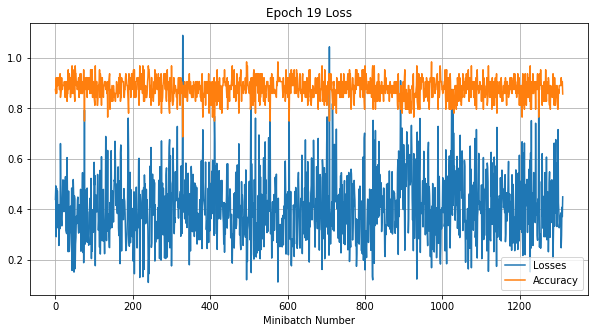

Starting epoch 20 / 20
t = 100, loss = 0.4433, acc = 0.8594
t = 200, loss = 0.4826, acc = 0.8594
t = 300, loss = 0.3836, acc = 0.8906
t = 400, loss = 0.3661, acc = 0.9062
t = 500, loss = 0.4368, acc = 0.8750
t = 600, loss = 0.5007, acc = 0.8594
t = 700, loss = 0.5865, acc = 0.8281
t = 800, loss = 0.2915, acc = 0.9375
t = 900, loss = 0.4206, acc = 0.8594
t = 1000, loss = 0.4827, acc = 0.8438
t = 1100, loss = 0.4977, acc = 0.8750
t = 1200, loss = 0.6497, acc = 0.7656
t = 1300, loss = 0.3447, acc = 0.9062
Epoch 20, Overall Loss: 0.4222 and Accuracy: 0.8775
Validation:
Got 3780 / 4410 correct (85.71)


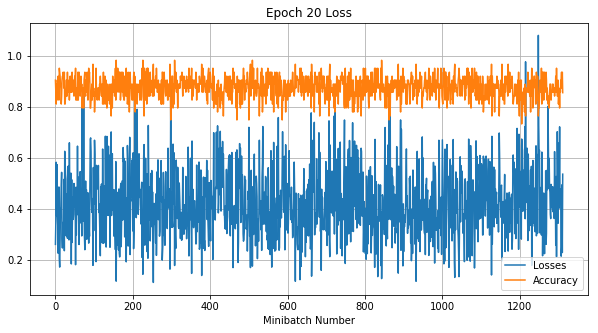

In [19]:
net = MobileNet().cuda()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, dampening=0, weight_decay=0.0005, nesterov=True)
best_model = train(net, loss_fn, optimizer, num_epochs=20)

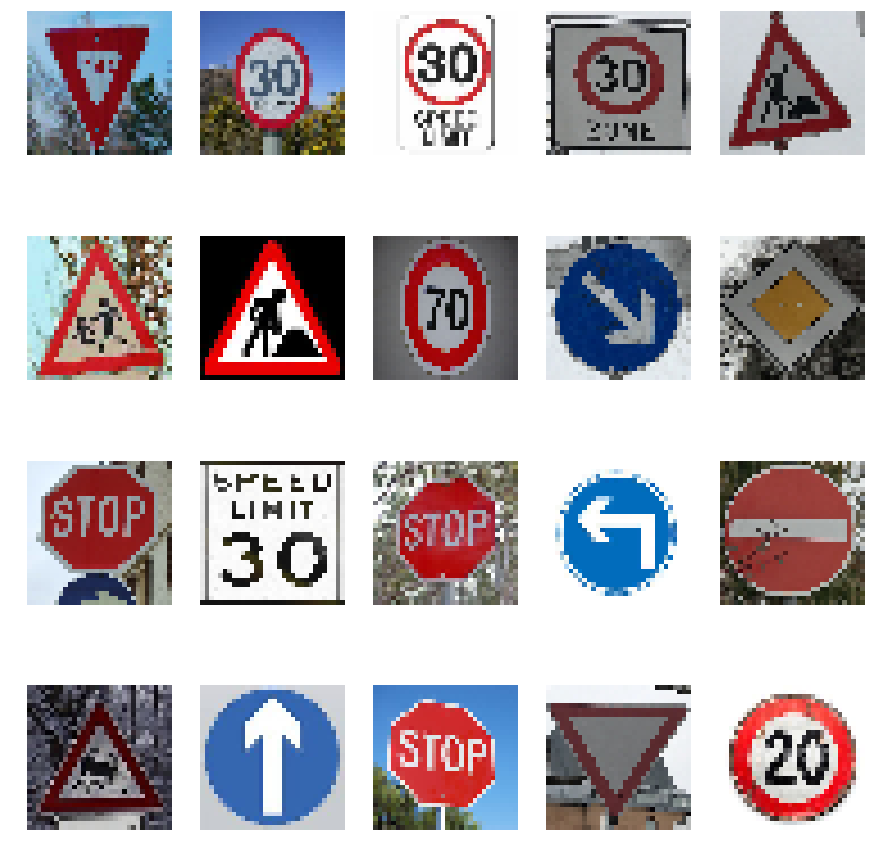

In [27]:
import os
test_images = []
path = "dataset/test_images/"
for image in os.listdir(path):
    img = cv2.imread(path + image)
    img = cv2.resize(img, (32,32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_images.append(img)

plt.figure(figsize=(15, 20))
for i, image in enumerate(test_images):
    grid = plt.subplot(len(test_images)/4,5,i+1)
    grid.imshow(image), plt.axis('off')
    
plt.show()

In [56]:
test_tensors = torch.from_numpy(np.transpose(np.asarray(test_images), (0,3,1,2))).float()
print(type(test_tensors), test_tensors.size())

<class 'torch.FloatTensor'> torch.Size([20, 3, 32, 32])


In [47]:
from torchvision import datasets
from torchvision import transforms as T

preprocess = T.Compose(
    [T.ToTensor(),
     T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_tensors = data_utils.DataLoader(datasets.ImageFolder(root="dataset", transform=preprocess))

In [60]:
correct = 0
total = 0
best_model.eval()
inputs = Variable(test_tensors.cuda(), volatile=True)
outputs = best_model(inputs)
_, predicted = torch.max(outputs.data.cpu(), 1)
print(predicted)


 13
 28
  0
  1
 25
 28
 11
  8
 38
 12
 14
 42
 14
 35
 17
 23
 35
 25
 13
  0
[torch.LongTensor of size 20]



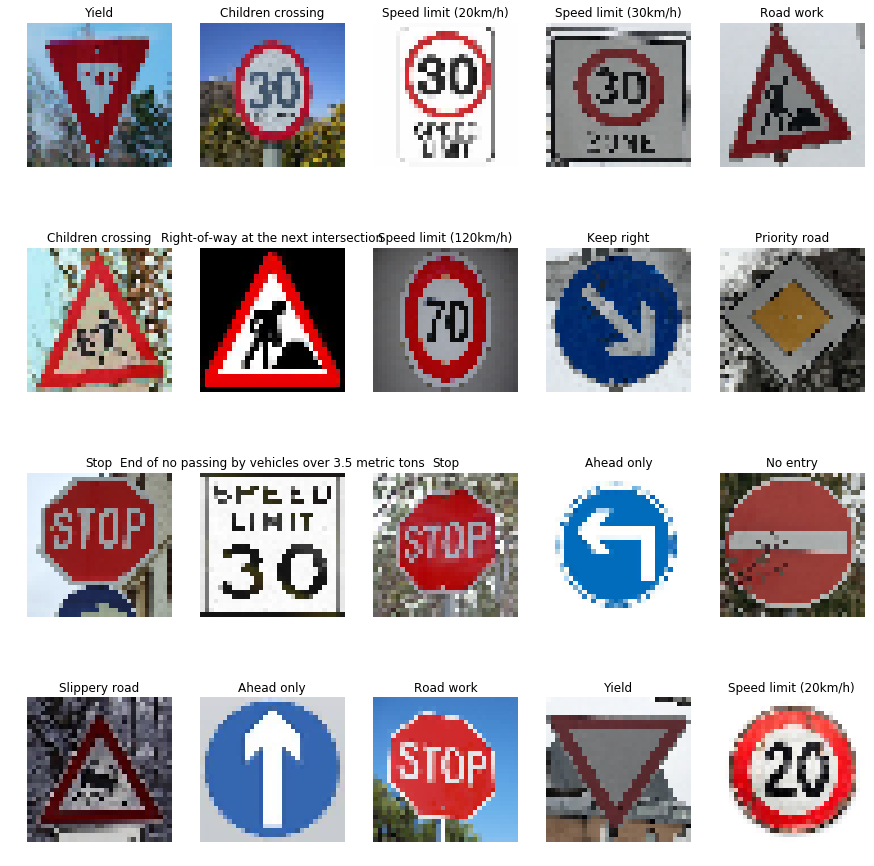

In [63]:
outputclass = predicted.numpy()

plt.figure(figsize=(15,20))

for i, image in enumerate(test_images):
    grid = plt.subplot(len(test_images)/4,5,i+1)
    grid.imshow(image), plt.axis('off')
    plt.title(labels_names[outputclass[i]])

plt.show()

In [71]:
top_K_values, top_K_indices = torch.topk(outputs.data.cpu(), dim=1, k=5)
top_K_values, top_K_indices = top_K_values.numpy(), top_K_indices.numpy()
for i, image in enumerate(test_images):
    print("image", i + 1)
    for j in range(5):
        print(labels_names[top_K_indices[i][j]], "\t\t " ,top_K_values[i][j])

RuntimeError: cuda runtime error (4) : unspecified launch failure at /opt/conda/conda-bld/pytorch_1518243271935/work/torch/lib/THC/generic/THCTensorCopy.c:70

In [ ]:
def plot_probability_per_class(probabilities, classes, image):   
    mpl_fig = plt.figure(figsize=(8,2))
    ax = mpl_fig.add_subplot(121)
    ax.set_ylabel('Probability')
    ax.set_xlabel('Class ID')
    ax.set_title('Top 5 probabilities')
    ax.bar(classes, probabilities, 1, color='blue', label='Inputs per class')
    
    top = probabilities.argmax()
    class_id = classes[top]
    
    ax = mpl_fig.add_subplot(122)
    ax.set_xticks([])
    ax.set_yticks([])
    title = "Predicted: %s" % label_name[class_id+1][1]
    ax.set_title(title)
    ax.imshow(image)
    
    plt.show()


new_softmax_predictions = tf.nn.softmax(conv.logits)
top_five = tf.nn.top_k(new_softmax_predictions, k=10, sorted=True, name=None)
    
print("probabilities:")
probabilities = top_five.values.eval({conv.features: test_images, conv.kp: 1}, session=conv.sess)
print(probabilities)
    
print("class ids:")
classes = top_five.indices.eval({conv.features: test_images, conv.kp: 1}, session=conv.sess)
print(classes)
    
for p, c, i in zip(probabilities, classes, test_images):
    plot_probability_per_class(p, c, i)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [1]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")